# Foreseeing Variable Problems When Building ML Models

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# to display the total number columns present in the dataset
pd.set_option('display.max_columns', None)

## Identifying numerical and categorical variables

A variable is a characteristic, number, or quantity that can be measured or counted. Most variables in a dataset are either numerical or categorical. Numerical variables take numbers as values and can be discrete or continuous, whereas for categorical variables, the values are selected from a group of categories, also called labels.

**Variables in their original, raw format are not suitable to train machine learning algorithms.:**
- Python library for machine learning, **does not support missing values or strings** (the categories) as inputs for machine learning algorithms, so we need to convert those values into numbers.
- Second, the **number of missing values or the distributions of the 
strings in categorical variables** (known as cardinality and frequency) may affect model performance or inform the technique we should implement to replace them by numbers
- Third, **some machine learning algorithms make assumptions about the distributions of the 
variables** and their relationship with the target
- Variable distribution, outliers, and feature magnitude may also affect machine learning model performance...

In [2]:
file_name = "data/boston_listings.csv"
airbnb_boston = pd.read_csv(file_name)

In [3]:
airbnb_boston.head()

,id,name,summary,access,interaction,house_rules,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood,neighbourhood_cleansed,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities_dict,price,cleaning_fee,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,is_business_travel_ready,cancellation_policy,reviews_per_month
0,3781,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,Guests solely occupy the 1 floor apartment wit...,We sometimes travel. Always available via: mob...,"No pets, no smoking.",4804,2008-12-03,Massachusetts,within a few hours,100%,44%,t,East Boston,5,"['email', 'phone', 'reviews']",f,East Boston,East Boston,2128,42.36413,-71.02991,t,Apartment,Entire home/apt,2,1.0,1.0,0.0,Real Bed,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air condi...",$125.00,$75.00,11,20,20,97,16,99.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,f,f,super_strict_30,0.28
1,5506,**$49 Special ** Private! Minutes to center!,"Private guest room with private bath, You do n...",You get full access to the guest room with pri...,"We give guests privacy, but we are available ...",No Smoking in the Building.,8229,2009-02-19,"Boston, Massachusetts, United States",within an hour,100%,100%,t,Roxbury,2,"['email', 'phone', 'reviews', 'kba']",t,Roxbury,Roxbury,2119,42.32981,-71.09559,t,Guest suite,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air condi...",$145.00,$60.00,1,14,44,307,106,95.0,10.0,10.0,10.0,10.0,9.0,10.0,t,Exempt: This listing is a unit that has contra...,t,f,strict_14_with_grace_period,0.79
2,6695,$99 Special!! Home Away! Condo,"Comfortable, Fully Equipped private apartment...","Full Private apartment. 1 bedroom, kitchen, ...",NaN,No Smoking in the Building.,8229,2009-02-19,"Boston, Massachusetts, United States",within an hour,100%,100%,t,Roxbury,2,"['email', 'phone', 'reviews', 'kba']",t,Roxbury,Roxbury,2119,42.32994,-71.09351,t,Condominium,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air condi...",$169.00,$80.00,1,4,19,266,115,96.0,10.0,10.0,10.0,10.0,9.0,10.0,t,STR-404620,t,f,strict_14_with_grace_period,0.88
3,8789,Curved Glass Studio/1bd facing Park,"Bright, 1 bed with curved glass windows facing...",Guests have access to the full unit,I'm available for questions and/or issues.,NaN,26988,2009-07-22,"Boston, Massachusetts, United States",within a few hours,100%,83%,t,Beacon Hill,10,"['email', 'phone', 'reviews', 'jumio', 'offlin...",f,Beacon Hill,Downtown,2108,42.35919,-71.06265,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air condi...",$99.00,$250.00,17,42,42,290,24,93.0,9.0,9.0,10.0,10.0,10.0,9.0,t,NaN,f,f,strict_14_with_grace_period,0.35
4,10730,Bright 1bed facing Golden Dome,"Bright, spacious unit, new galley kitchen, new...",Guests have access to everything in the unit.,I'm available as needed.,"NO SMOKING, NO PETS. $100 move-in fee payable ...",26988,2009-07-22,"Boston, Massachusetts, United States",within a few hours,100%,83%,t,Beacon Hill,10,"['email', 'phone', 'reviews', 'jumio', 'offlin...",f,Beacon Hill,Downtown,2108,42.35840,-71.06185,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{'TV': 1, 'Cable TV': 1, 'Wifi': 1, 'Air condi...",$150.00,$250.00,28,29,29,42,31,95.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,f,f,strict_14_with_grace_period,0.24


In [4]:
airbnb_boston.shape

(3845, 51)

In [5]:
airbnb_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3845 entries, 0 to 3844
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           3845 non-null   int64  
 1   name                         3845 non-null   object 
 2   summary                      3765 non-null   object 
 3   access                       2208 non-null   object 
 4   interaction                  2589 non-null   object 
 5   house_rules                  2855 non-null   object 
 6   host_id                      3845 non-null   int64  
 7   host_since                   3845 non-null   object 
 8   host_location                3842 non-null   object 
 9   host_response_time           3283 non-null   object 
 10  host_response_rate           3283 non-null   object 
 11  host_acceptance_rate         3585 non-null   object 
 12  host_is_superhost            3845 non-null   object 
 13  host_neighbourhood

In [6]:
airbnb_boston.dtypes

id                               int64
name                            object
summary                         object
access                          object
interaction                     object
house_rules                     object
host_id                          int64
host_since                      object
host_location                   object
host_response_time              object
host_response_rate              object
host_acceptance_rate            object
host_is_superhost               object
host_neighbourhood              object
host_total_listings_count        int64
host_verifications              object
host_identity_verified          object
neighbourhood                   object
neighbourhood_cleansed          object
zipcode                         object
latitude                       float64
longitude                      float64
is_location_exact               object
property_type                   object
room_type                       object
accommodates             

In [7]:
airbnb_boston.dtypes.value_counts()

object     29
float64    13
int64       9
Name: count, dtype: int64

In [8]:
airbnb_boston['bedrooms'].unique()

array([ 1.,  0.,  3.,  2.,  4.,  5., nan,  6., 13.,  8.,  7.])

In [9]:
airbnb_boston['price'].unique()[0:20]

array(['$125.00', '$145.00', '$169.00', '$99.00', '$150.00', '$179.00',
       '$50.00', '$154.00', '$115.00', '$148.00', '$275.00', '$221.00',
       '$95.00', '$75.00', '$175.00', '$110.00', '$79.00', '$140.00',
       '$225.00', '$200.00'], dtype=object)

In [10]:
airbnb_boston.nunique()

id                             3845
name                           3682
summary                        2722
access                         1492
interaction                    1405
house_rules                    1531
host_id                        1331
host_since                     1080
host_location                   123
host_response_time                4
host_response_rate               35
host_acceptance_rate             73
host_is_superhost                 2
host_neighbourhood               65
host_total_listings_count        51
host_verifications              152
host_identity_verified            2
neighbourhood                    31
neighbourhood_cleansed           25
zipcode                          54
latitude                       2838
longitude                      2968
is_location_exact                 2
property_type                    21
room_type                         4
accommodates                     19
bathrooms                        12
bedrooms                    

In [11]:
airbnb_boston['host_response_time'].unique()

array(['within a few hours', 'within an hour', 'a few days or more',
       'within a day', nan], dtype=object)

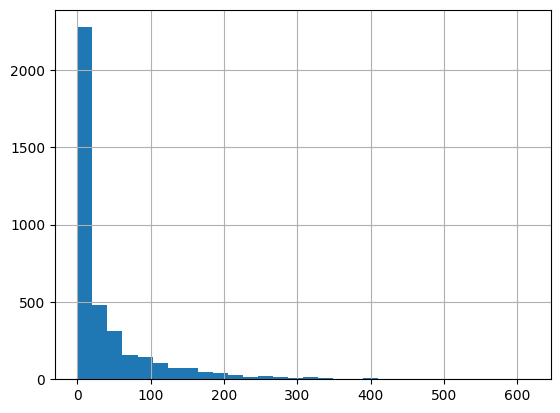

In [14]:
airbnb_boston['number_of_reviews'].hist(bins=30)
plt.show()

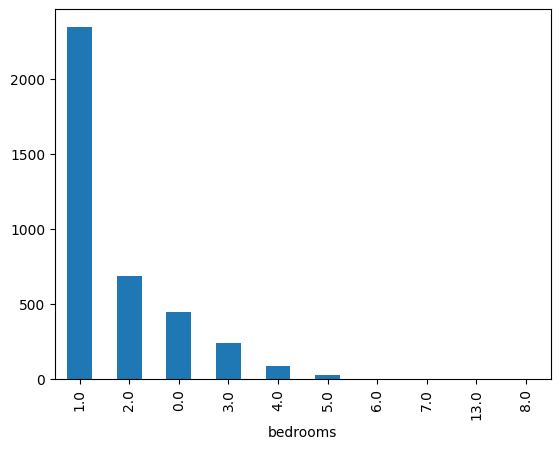

In [15]:
airbnb_boston['bedrooms'].value_counts().plot.bar()
plt.show()

In [16]:
airbnb_boston['price'][:5] # problam je dolar signa ki ga moremo odstranit

0    $125.00
1    $145.00
2    $169.00
3     $99.00
4    $150.00
Name: price, dtype: object

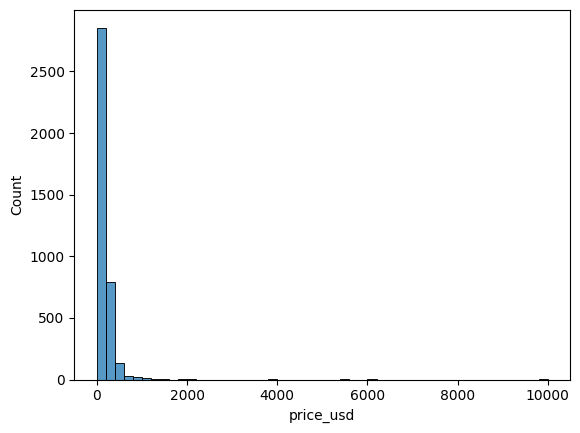

In [24]:
airbnb_boston['price_usd'] = airbnb_boston['price'].str.replace("$", "").str.replace(",", "").astype("float")
airbnb_boston['cleaning_fee_usd'] = airbnb_boston['cleaning_fee'].str.replace("$", "").str.replace(",", "").astype("float")
airbnb_boston.drop(columns=["price", "cleaning_fee"], inplace=True)
sns.histplot(airbnb_boston['price_usd'], bins=50)
plt.show()

>> Nadaljujemo 

In [20]:
airbnb_boston['cleaning_fee']

0        $75.00
1        $60.00
2        $80.00
3       $250.00
4       $250.00
         ...   
3840      $0.00
3841    $120.00
3842        NaN
3843        NaN
3844      $0.00
Name: cleaning_fee, Length: 3845, dtype: object

In [ ]:
# bar plots for categorical variables
airbnb_boston['host_response_time'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of hosts')
plt.title('Response time')
plt.show()

## Quantifying missing data

In [ ]:
airbnb_boston.isnull().sum()

In [ ]:
airbnb_boston.isnull().mean() * 100

In [ ]:
airbnb_boston.isnull().mean().plot.bar(figsize=(8,4))
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.title('Quantifying missing data')
plt.show()

In [ ]:
columns_to_remove = ["id", "name", "summary", "access", "interaction", "host_id", "host_verifications", "license"]
airbnb_boston.drop(columns=columns_to_remove, inplace=True)
airbnb_boston.head()

## Determining cardinality in categorical variables

In [ ]:
airbnb_boston.nunique()

In [ ]:
airbnb_boston['property_type'].unique()

In [ ]:
airbnb_boston.nunique().plot.bar(figsize=(8,4))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')
plt.show()

## Pinpointing rare categories in categorical variables

In [ ]:
airbnb_boston['property_type'].unique()

In [ ]:
label_freq = airbnb_boston['property_type'].value_counts() / len(airbnb_boston) * 100
print(label_freq)

In [ ]:
fig = label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=5, color='red')
fig.set_ylabel('percentage of each category')
fig.set_xlabel('Variable: property_type')
fig.set_title('Identifying Rare Categories')
plt.show()

## Identifying a linear relationship

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
np.random.seed(29)
x = np.random.randn(200)

In [ ]:
y = x * 10 + np.random.randn(200) * 2

In [ ]:
data = pd.DataFrame([x, y]).T
data.columns = ['x', 'y']

In [ ]:
# we used the seaborn lmplot() method, which allows us to plot the data and fit and display a linear model on top of it
sns.lmplot(x="x", y="y", data=data, order=1)
plt.ylabel('Target')
plt.xlabel('Independent variable')
plt.show()

In [ ]:
linreg = LinearRegression()
linreg.fit(data['x'].to_frame(), data['y'])

In [ ]:
# Make predictions of y using the fitted linear model:
predictions = linreg.predict(data['x'].to_frame())

# Calculate the residuals, that is, the difference between the predictions and the real outcome, y:
residuals = data['y'] - predictions

# Make a scatter plot of the independent variable x and the residuals:
plt.scatter(y=residuals, x=data['x'])
plt.ylabel('Residuals')
plt.xlabel('Independent variable x')
plt.show()

In [ ]:
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel('Residuals')
plt.show()

### Example: Boston House price data

In [ ]:
# we plot the variable LAST (% lower status of the population)
# vs the target MEDV (median value of the house)
sns.lmplot(x="bedrooms", y="price_usd", data=airbnb_boston, order=1)
plt.show()

In [ ]:
sns.lmplot(x="latitude", y="price_usd", data=airbnb_boston, order=1)
plt.show()

## Identifying a normal distribution

In [ ]:
np.random.seed(29)
x = np.random.randn(200)

In [ ]:
data = pd.DataFrame([x]).T
data.columns = ['x']

In [ ]:
sns.histplot(data['x'], bins=30, kde=True)
plt.show()

In [ ]:
stats.probplot(data['x'], dist="norm", plot=plt)
plt.show()

### Example: Boston House price data

In [ ]:
stats.probplot(airbnb_boston['latitude'], dist="norm", plot=plt)
plt.show()

In [ ]:
stats.probplot(airbnb_boston['number_of_reviews'], dist="norm", plot=plt)
plt.show()

In [ ]:
sns.histplot(airbnb_boston['number_of_reviews'], bins=30, kde=True)
plt.show()

## Distinguishing variable distribution

In [ ]:
airbnb_boston.hist(bins=30, figsize=(12,12), density=True)
plt.show()

## Highlighting outliers

In [ ]:
plt.figure(figsize=(3,6))
sns.boxplot(y=airbnb_boston['reviews_per_month'])
plt.title('Boxplot')
plt.show()

In [ ]:
def find_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary

In [ ]:
upper_boundary, lower_boundary = find_boundaries(airbnb_boston, 'price_usd', 3)
upper_boundary, lower_boundary

In [ ]:
outliers = np.where(airbnb_boston['price_usd'] > upper_boundary, True, np.where(airbnb_boston['price_usd'] < lower_boundary, True, False))

In [ ]:
outliers_df = airbnb_boston.loc[outliers, 'price_usd']
outliers_df.head()

## Comparing feature magnitude

In [ ]:
airbnb_boston.describe()

In [ ]:
airbnb_boston.select_dtypes(exclude="object").max() - airbnb_boston.select_dtypes(exclude="object").min()